#EOS491 - Assignment 1 - Matt Griffiths (V00752005)

Question 1

In [2]:
import numpy as np
import numpy.linalg as lg
import scipy as sc
import math as m
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pylab as P
%matplotlib inline

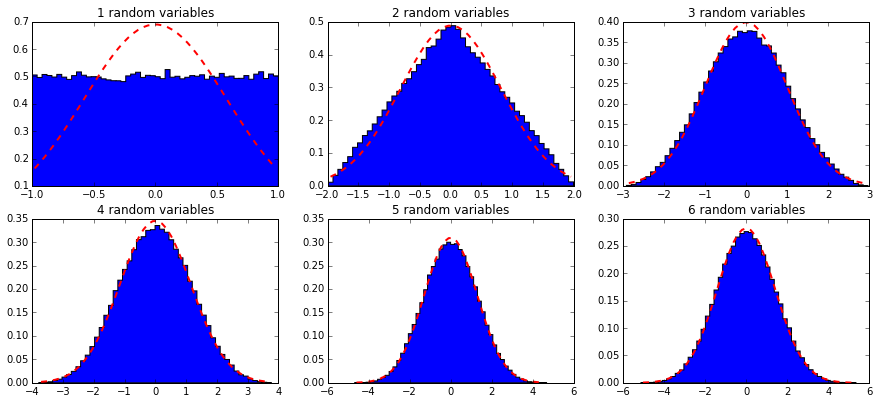

In [3]:
elements = 200000

plots = 6
index = [[i, np.random.random(elements), np.random.random(elements)] for i in range(plots) ]
plt.figure(figsize=(15,10))

for j in range(0, plots, 1):
    for i in range(0,elements,1):
        if(index[j][2][i]<0.5): index[j][2][i]=-1
        else: index[j][2][i]=1
        index[j][1][i] = index[j][1][i]*index[j][2][i]
    if(j>0): index[j][1]=index[j][1]+index[j-1][1]
    ax = plt.subplot(m.ceil(m.sqrt(plots)),m.ceil(m.sqrt(plots)),j+1)
    n, bins, patches = ax.hist(index[j][1], 50, normed=1, histtype='stepfilled')
    bincenters = 0.5*(bins[+1:]+bins[:-1])
    y = mlab.normpdf(bincenters, np.mean(index[j][1]), np.std(index[j][1]))
    l = ax.plot(bincenters, y, 'r--', linewidth=2)
    plt.title(str(index[j][0]+1)+' random variables')

plt.savefig('addrand.pdf')

By the time 3 random variables are added together, the distribution differs very little from the Guassian type. This is consistent with the central limit theorem.

Question 2

In [4]:
def invertmodel():
    mt = np.array([[-6], [11], [-6], [1]])
    z = np.zeros(41)
    for i in range(1,42,1):
        z[i-1] = (i-1)/10.0

    one = z*0.0 +1.
    z2 = z**2
    z3 = z**3

    A = np.array([one, z, z2, z3])
    A = A.T

    dt = np.zeros(41)
    dk = np.array(np.dot(A, mt))
    for i in range(0,41,1):
        dt[i] = dk[i][0]
    
    d = dt+np.random.normal(0, 1, 41)
    m = np.dot(lg.inv(np.dot(A.T, A)),np.dot(A.T, d))
    dp = np.dot(A, m)
    
    data = [z, dt, dp, d]
    return data

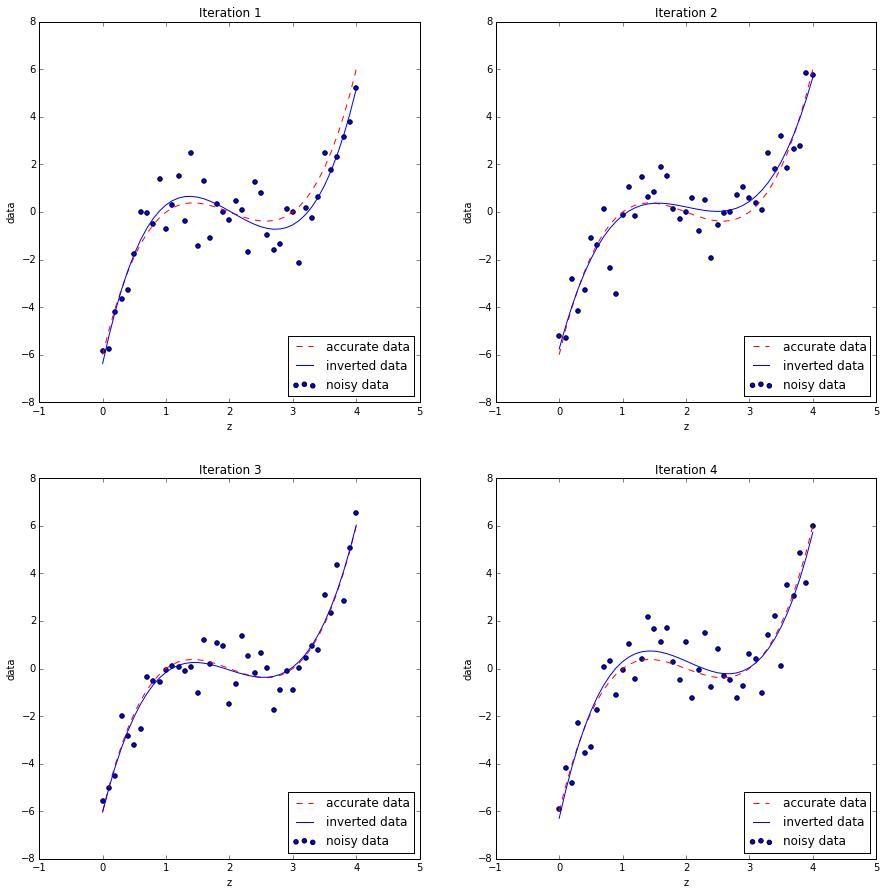

In [5]:
plots = 4
index = [[i, invertmodel()] for i in range(plots) ]
plt.figure(figsize=(15,15))

for j in range(0, plots, 1):
    ax = plt.subplot(m.ceil(m.sqrt(plots)),m.ceil(m.sqrt(plots)),j+1)
    ax = plt.plot(index[j][1][0],index[j][1][1],'r--', label='accurate data')
    ax = plt.scatter(index[j][1][0], index[j][1][3], label='noisy data')
    ax = plt.plot(index[j][1][0], index[j][1][2], label='inverted data')
    ax = plt.xlabel('z'); plt.ylabel('data')
    ax = plt.title('Iteration ' + str(j+1))
    ax = plt.legend(loc=4)

plt.savefig('invert1.pdf')